## Import necessary libraries

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

## Read data

In [16]:
import pandas as pd

# Load the dataset from the CSV file
file_path = '/content/fictitious_overdeu_dataset.csv'  # Update with the actual path
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Convert date columns to datetime format
df['Due Date'] = pd.to_datetime(df['Due Date'], format='%d-%m-%y')
df['Created At'] = pd.to_datetime(df['Created At'], format='%d-%m-%y')

                   User      Mobile Number                   Supplier  \
0        Amanda Mcclure  041.788.0344x2231                Smith Group   
1      Ronald Scott PhD   511-303-0303x870  Jones, Moran and Robinson   
2  Mr. Richard West Jr.  074-263-4408x9899                Smith Group   
3         Melissa Riley    +1-260-872-2301  Estrada, Ibarra and Reyes   
4     Dr. David Lane MD      (225)683-0754            Harvey and Sons   

   Whole Amount  Paid Amount  Due Date   Status Created At  
0      31558.44      2015.12  01-10-26  Overdue   15-11-23  
1       3981.83      8505.44  13-10-25  Overdue   10-12-23  
2      36205.06      5257.47  16-05-25  Overdue   02-01-24  
3      90978.29      4921.54  24-01-25  Overdue   24-05-24  
4       5137.47      8928.55  13-09-26  Overdue   02-04-24  


In [64]:
df.head()

,User,Mobile Number,Supplier,Whole Amount,Paid Amount,Due Date,Status,Created At,Days Overdue,Year,Month,Year-Month
0,Amanda Mcclure,041.788.0344x2231,Smith Group,31558.44,2015.12,2026-10-01,Overdue,2023-11-15,-706,2026,10,2023-11
1,Ronald Scott PhD,511-303-0303x870,"Jones, Moran and Robinson",3981.83,8505.44,2025-10-13,Overdue,2023-12-10,-353,2025,10,2023-12
2,Mr. Richard West Jr.,074-263-4408x9899,Smith Group,36205.06,5257.47,2025-05-16,Overdue,2024-01-02,-203,2025,5,2024-01
3,Melissa Riley,+1-260-872-2301,"Estrada, Ibarra and Reyes",90978.29,4921.54,2025-01-24,Overdue,2024-05-24,-91,2025,1,2024-05
4,Dr. David Lane MD,(225)683-0754,Harvey and Sons,5137.47,8928.55,2026-09-13,Overdue,2024-04-02,-688,2026,9,2024-04


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   User           7000 non-null   object        
 1   Mobile Number  7000 non-null   object        
 2   Supplier       7000 non-null   object        
 3   Whole Amount   7000 non-null   float64       
 4   Paid Amount    7000 non-null   float64       
 5   Due Date       7000 non-null   datetime64[ns]
 6   Status         7000 non-null   object        
 7   Created At     7000 non-null   datetime64[ns]
 8   Days Overdue   7000 non-null   int64         
 9   Year           7000 non-null   int32         
 10  Month          7000 non-null   int32         
 11  Year-Month     7000 non-null   period[M]     
dtypes: datetime64[ns](2), float64(2), int32(2), int64(1), object(4), period[M](1)
memory usage: 601.7+ KB


### Operations

In [17]:
# 1. Total Outstanding Amount
total_outstanding = df["Whole Amount"].sum()


# 2. Average Overdue Amount Per Customer
average_overdue_per_customer = df.groupby("User")["Whole Amount"].sum().mean()


# 3. Customer Overdue Ratio
customer_overdue_ratio = df["User"].nunique()


# 4. Customer Payment History (multiple overdue payments)
customer_overdue_history = df["User"].value_counts()


# 5. Total Outstanding Amount by Due Date
total_outstanding_by_due_date = df.groupby("Due Date")["Whole Amount"].sum()


# 6. Risk Assessment by Customer (customers with higher overdue amounts)
risk_assessment_by_customer = df.groupby("User")["Whole Amount"].sum().sort_values(ascending=False)


# 7. Time Duration of Overdue Accounts (assuming today as current date)
current_date = datetime.today()
df["Days Overdue"] = (current_date - df["Due Date"]).dt.days


# Calculate average days overdue across all accounts
average_days_overdue = df["Days Overdue"].mean()

### Summary results

In [18]:
results = {
    "Total Outstanding Amount": total_outstanding,
    "Average Overdue Amount Per Customer": average_overdue_per_customer,
    "Customer Overdue Ratio": customer_overdue_ratio,
    "Customer Payment History": customer_overdue_history,
    "Total Outstanding Amount by Due Date": total_outstanding_by_due_date,
    "Risk Assessment by Customer": risk_assessment_by_customer,
    "Average Days Overdue": average_days_overdue
}

results

{'Total Outstanding Amount': 350339122.22,
 'Average Overdue Amount Per Customer': 52391.07555256468,
 'Customer Overdue Ratio': 6687,
 'Customer Payment History': User
 Michael Williams        5
 Michael Smith           5
 David Taylor            4
 Michael Edwards         4
 John Johnson            4
                        ..
 Mrs. Julia Henderson    1
 Kimberly Taylor MD      1
 Jacqueline Mann         1
 Christopher Jackson     1
 Zachary Crawford        1
 Name: count, Length: 6687, dtype: int64,
 'Total Outstanding Amount by Due Date': Due Date
 2024-10-25    413701.11
 2024-10-26    817601.67
 2024-10-27    362780.84
 2024-10-28    326298.76
 2024-10-29    505664.94
                 ...    
 2026-10-20    744628.01
 2026-10-21    217493.91
 2026-10-22    561204.84
 2026-10-23    619184.72
 2026-10-24    486240.72
 Name: Whole Amount, Length: 730, dtype: float64,
 'Risk Assessment by Customer': User
 David Williams      325176.32
 David Miller        291174.94
 Michael Williams 

### Graph 1: Total Outstanding Amount by Due Date

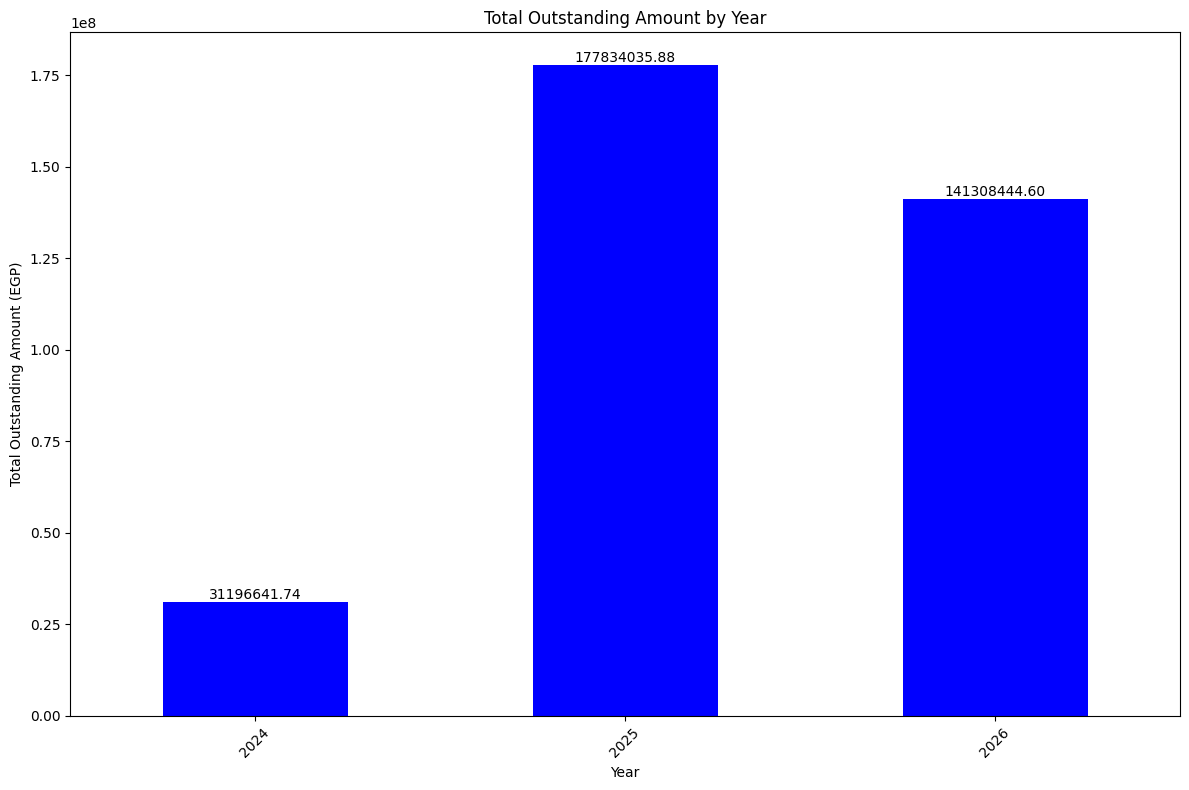

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the Due Date column to datetime format (handling any errors)
df["Due Date"] = pd.to_datetime(df["Due Date"], format="%d-%m-%y", errors='coerce')

# Drop any rows where the conversion to datetime failed
df = df.dropna(subset=["Due Date"])

# Extract the year from the Due Date column
df["Year"] = df["Due Date"].dt.year

# Graph: Total Outstanding Amount by Year
plt.figure(figsize=(12, 8))
outstanding_amount_by_year = df.groupby("Year")["Whole Amount"].sum()
ax = outstanding_amount_by_year.plot(kind='bar', color='blue')
plt.title('Total Outstanding Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Outstanding Amount (EGP)')

# Add data labels
for index, value in enumerate(outstanding_amount_by_year):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Graph 2: Risk Assessment by Customer (customers with higher overdue amounts)

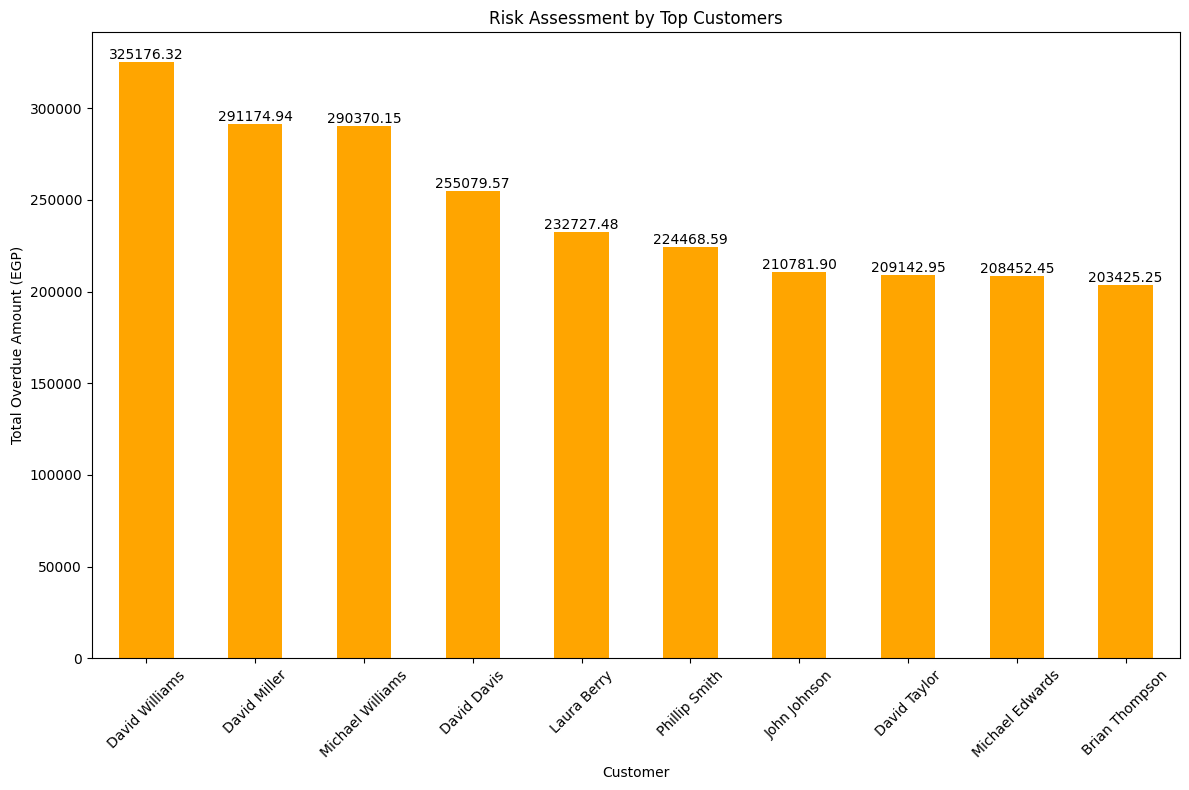

In [34]:
# Graph: Risk Assessment by Top Customers (with higher overdue amounts)
plt.figure(figsize=(12, 8))
# Group by user and sum overdue amounts, then sort and select top N
top_n = 10
risk_assessment_by_customer = df.groupby("User")["Whole Amount"].sum().sort_values(ascending=False).head(top_n)

# Plot the data
ax = risk_assessment_by_customer.plot(kind='bar', color='orange')
plt.title('Risk Assessment by Top Customers')
plt.xlabel('Customer')
plt.ylabel('Total Overdue Amount (EGP)')

# Add data labels
for index, value in enumerate(risk_assessment_by_customer):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Graph 3: Customer Payment History

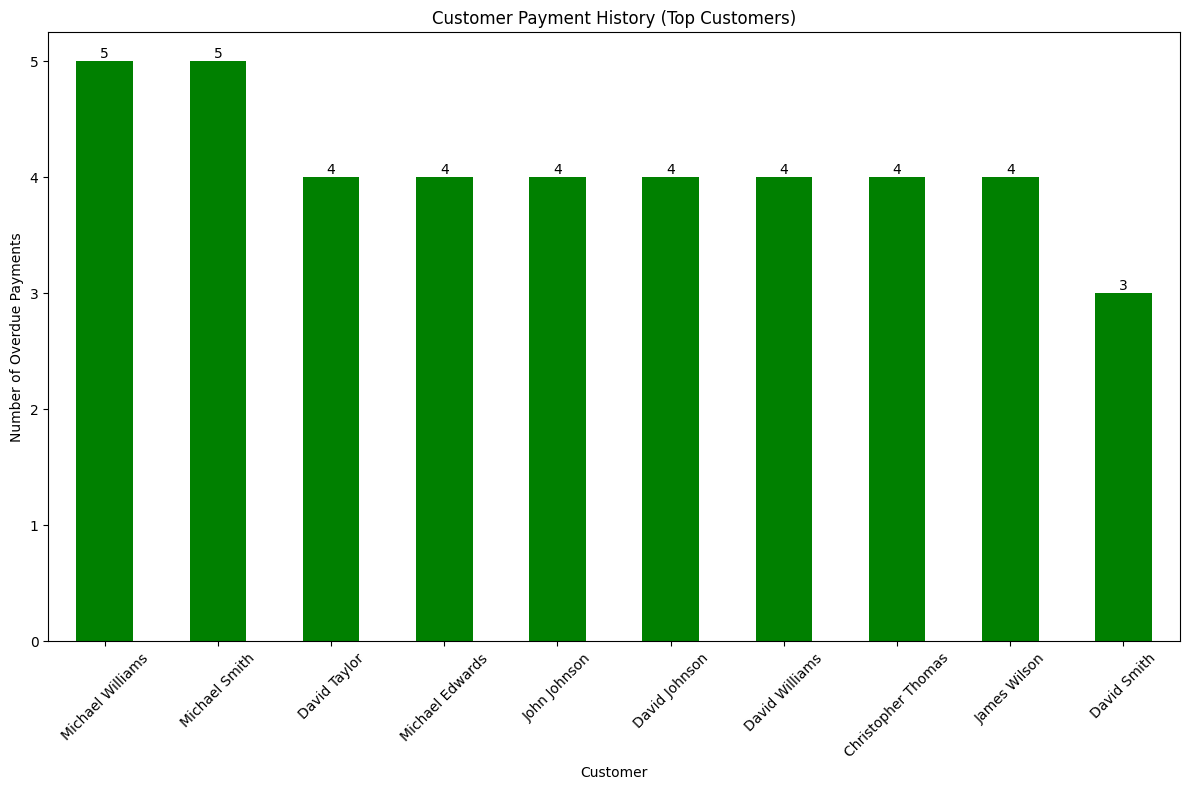

In [36]:
# Graph: Customer Payment History for Top Customers
plt.figure(figsize=(12, 8))
# Count overdue payments per user, sort, and select top N
top_n = 10
customer_payment_history = df["User"].value_counts().head(top_n)

# Plot the data
ax = customer_payment_history.plot(kind='bar', color='green')
plt.title('Customer Payment History (Top Customers)')
plt.xlabel('Customer')
plt.ylabel('Number of Overdue Payments')

# Add data labels
for index, value in enumerate(customer_payment_history):
    ax.text(index, value, f'{value}', ha='center', va='bottom', color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


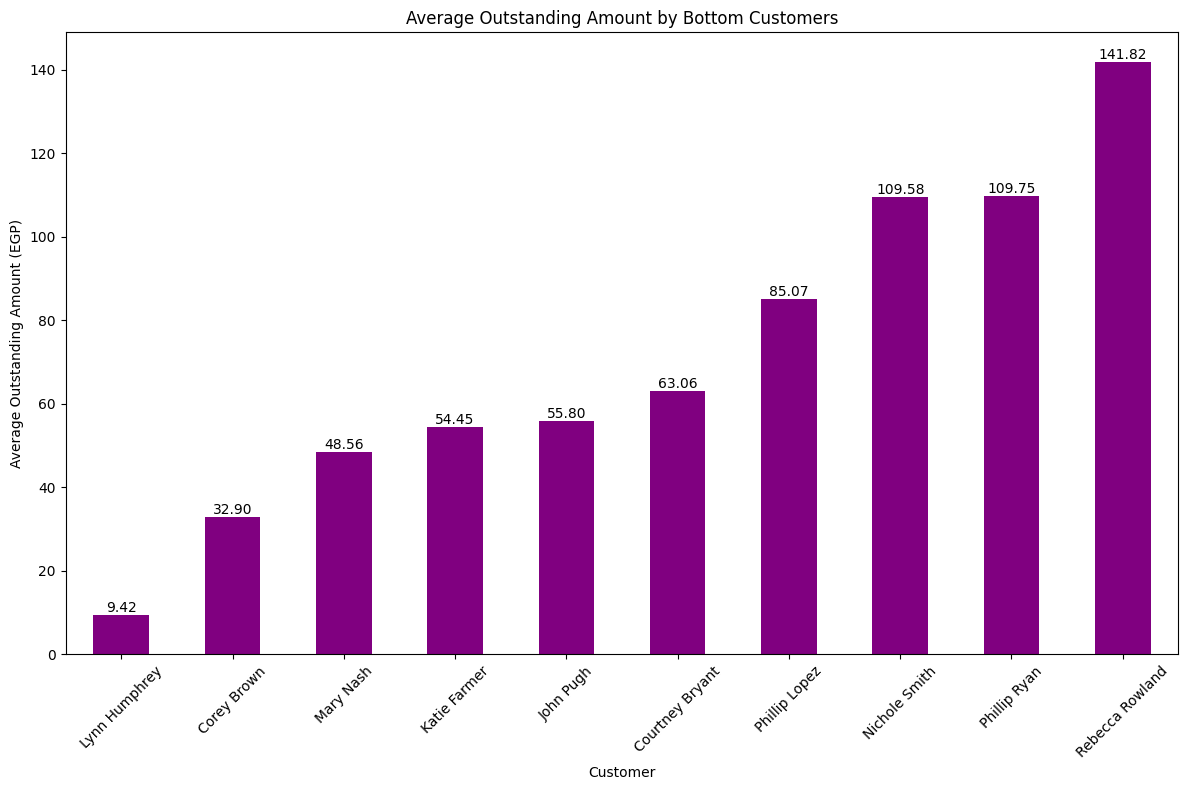

In [41]:
# Graph: Average Outstanding Amount by Bottom Customers
plt.figure(figsize=(12, 8))
# Group by user, calculate the mean outstanding amount, sort in ascending order, and select bottom N
bottom_n = 10
average_outstanding_by_customer = df.groupby("User")["Whole Amount"].mean().sort_values(ascending=True).head(bottom_n)

# Plot the data
ax = average_outstanding_by_customer.plot(kind='bar', color='purple')
plt.title('Average Outstanding Amount by Bottom Customers')
plt.xlabel('Customer')
plt.ylabel('Average Outstanding Amount (EGP)')

# Add data labels
for index, value in enumerate(average_outstanding_by_customer):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Graph 4: Average Days Overdue (horizontal bar chart)

In [49]:
# Calculate Days Overdue
df["Days Overdue"] = (pd.to_datetime("today") - pd.to_datetime(df["Due Date"], format='%d-%m-%y')).dt.days

# Calculate average days overdue, considering only overdue entries
overdue_entries = df[df["Days Overdue"] > 0]
average_days_overdue = overdue_entries["Days Overdue"].mean()  # Only consider overdue days

# Check if the average_days_overdue is finite
if pd.isna(average_days_overdue) or not pd.isfinite(average_days_overdue):
    print("No overdue entries to calculate average days overdue.")
else:
    # Graph: Average Days Overdue (horizontal bar chart)
    plt.figure(figsize=(8, 4))
    ax = plt.barh(['Average Days Overdue'], [average_days_overdue], color='purple')
    plt.title('Average Days Overdue')
    plt.xlabel('Average Days Overdue (days)')
    plt.ylabel('')

    # Add data label only if the average is valid
    plt.text(average_days_overdue, 0, f'{average_days_overdue:.2f}',
             va='center', ha='left', color='black', fontweight='bold')

    # Set x-axis limits to ensure the bar fits well
    plt.xlim(0, max(30, average_days_overdue + 10))

    plt.show()


No overdue entries to calculate average days overdue.


### Graph 5: Overdue Payments by Supplier

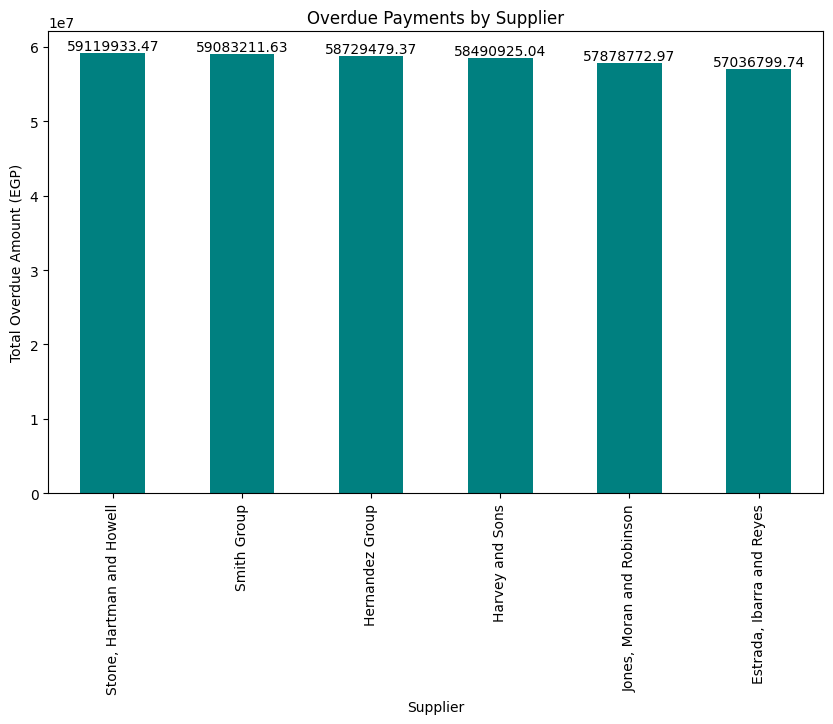

In [50]:
# Graph 5: Overdue Payments by Supplier
plt.figure(figsize=(10, 6))
overdue_by_supplier = df.groupby("Supplier")["Whole Amount"].sum().sort_values(ascending=False)
ax = overdue_by_supplier.plot(kind='bar', color='teal')
plt.title('Overdue Payments by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Total Overdue Amount (EGP)')

# Add data labels
for index, value in enumerate(overdue_by_supplier):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', color='black')

plt.show()

### Graph 6: Number of Overdue Payments by Due Date

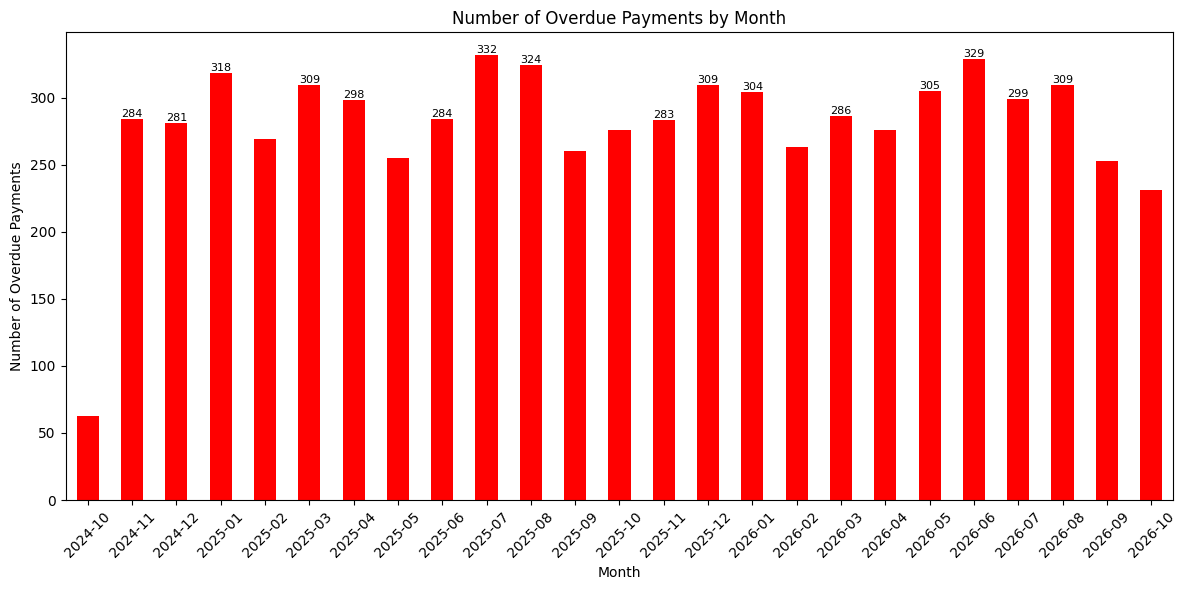

In [53]:
# Extract the year and month for grouping
df["Year-Month"] = df["Due Date"].dt.to_period("M")

# Group by Year-Month to count the number of overdue payments
number_of_overdue_by_month = df.groupby("Year-Month")["User"].count()

# Plotting the number of overdue payments by month
plt.figure(figsize=(12, 6))
ax = number_of_overdue_by_month.plot(kind='bar', color='red')
plt.title('Number of Overdue Payments by Month')
plt.xlabel('Month')
plt.ylabel('Number of Overdue Payments')

# Add selective data labels (e.g., at the top values)
for index, value in enumerate(number_of_overdue_by_month):
    if value > number_of_overdue_by_month.mean():
        ax.text(index, value, f'{value}', ha='center', va='bottom', color='black', fontsize=8)

# Set the x-axis
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Graph 7:Distribution of Overdue Amounts graph

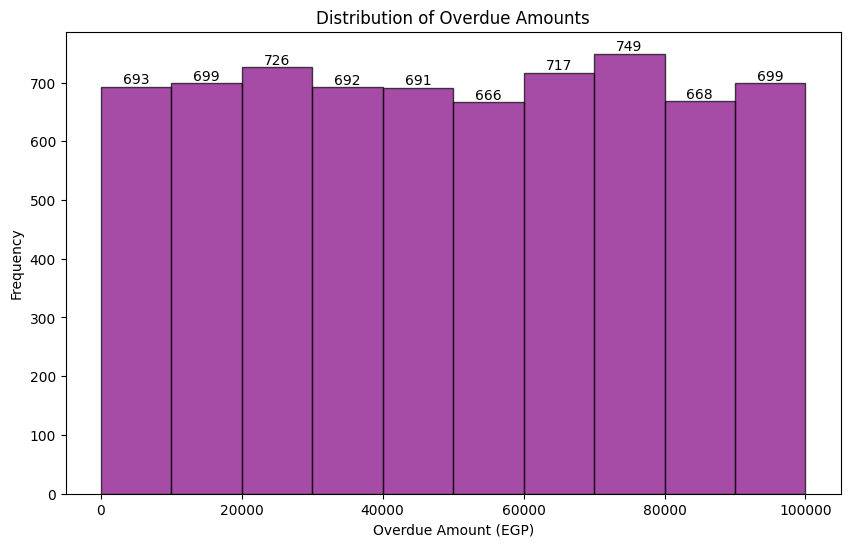

In [54]:
# Graph 7:Distribution of Overdue Amounts graph
# Plot a histogram of overdue amounts
plt.figure(figsize=(10, 6))

# Matplotlib's hist() function to plot the histogram and get n, bins, and patches
n, bins, patches = plt.hist(df["Whole Amount"], bins=10, color='purple', alpha=0.7, edgecolor='black')

plt.title('Distribution of Overdue Amounts')
plt.xlabel('Overdue Amount (EGP)')
plt.ylabel('Frequency')

# Add data labels on top of each bar
for i in range(len(n)):
    plt.text((bins[i] + bins[i + 1]) / 2, n[i], f'{n[i]:.0f}', ha='center', va='bottom', color='black')

plt.show()

### Graph 8: Customer Risk Profiles

<Figure size 1200x600 with 0 Axes>

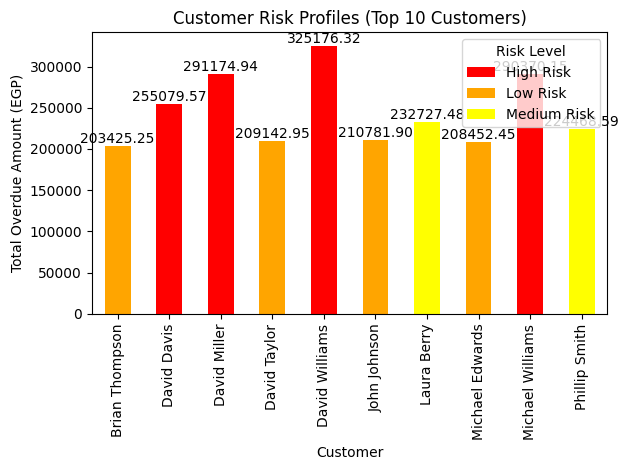

In [60]:
# Define risk thresholds
high_risk_threshold = 250000
low_risk_threshold = 217000

# Categorize customers based on the total overdue amount
df_risk = df.groupby("User")["Whole Amount"].sum().reset_index()  # Calculate total overdue per customer
df_risk["Risk Level"] = df_risk["Whole Amount"].apply(lambda x: (
    "High Risk" if x > high_risk_threshold else
    "Low Risk" if x <= low_risk_threshold else
    "Medium Risk"
))

# Sort by total overdue amount and select top customers
top_customers = df_risk.sort_values(by="Whole Amount", ascending=False).head(10)

# Prepare data for plotting
risk_levels = top_customers.groupby(["User", "Risk Level"])["Whole Amount"].sum().unstack().fillna(0)

# Plotting the risk levels for top customers
plt.figure(figsize=(12, 6))
risk_levels.plot(kind='bar', stacked=True, color=['red', 'orange', 'yellow'])
plt.title("Customer Risk Profiles (Top 10 Customers)")
plt.xlabel("Customer")
plt.ylabel("Total Overdue Amount (EGP)")

# Add data labels on top of bars for better visibility
for index, row in risk_levels.iterrows():
    for risk_level, value in row.items():
        if value > 0:
            plt.text(risk_levels.index.get_loc(index), value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Graph 9: Trend of Overdue Payments over Time

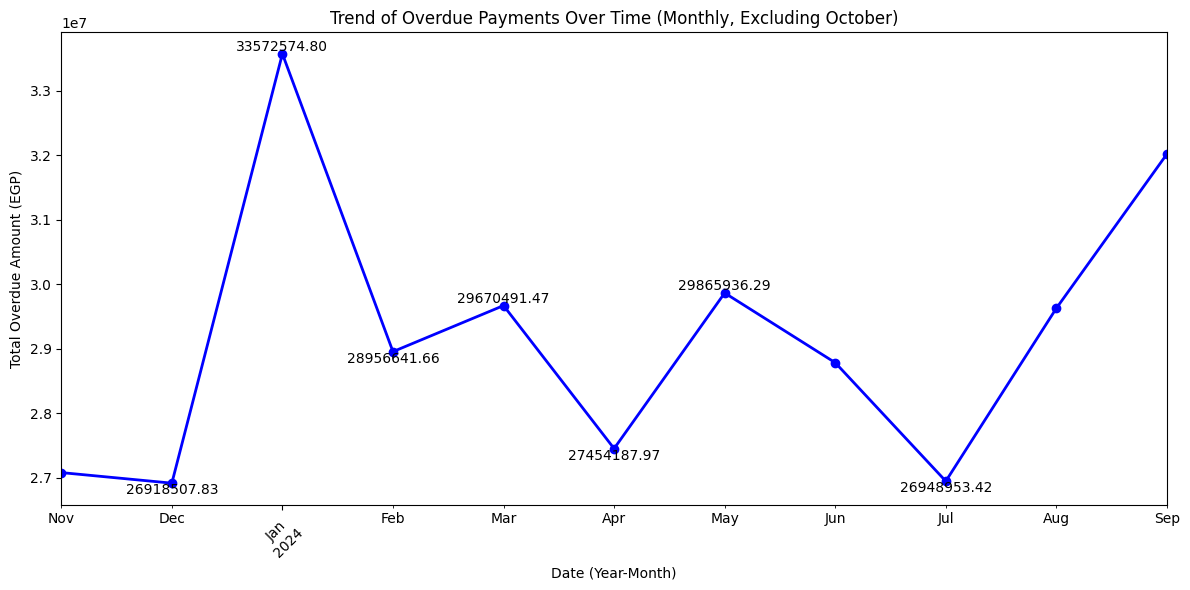

In [62]:
# Convert 'Created At' column to datetime format
df['Created At'] = pd.to_datetime(df['Created At'])

# Extract Year-Month for grouping
df['Year-Month'] = df['Created At'].dt.to_period('M')

# Filter out entries from October
df_filtered = df[df['Created At'].dt.month != 10]

# Group by Year-Month to get total overdue amounts, excluding October
overdue_trend_over_time = df_filtered.groupby("Year-Month")["Whole Amount"].sum()

# Plotting the trend of overdue payments over time
plt.figure(figsize=(12, 6))  # Adjusted figure size for clarity
ax = overdue_trend_over_time.plot(kind='line', color='blue', marker='o', linewidth=2)

# Adding titles and labels
plt.title('Trend of Overdue Payments Over Time (Monthly, Excluding October)')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Total Overdue Amount (EGP)')

# Add data labels at peaks and valleys
for i in range(1, len(overdue_trend_over_time) - 1):
    if overdue_trend_over_time.iloc[i] > overdue_trend_over_time.iloc[i - 1] and overdue_trend_over_time.iloc[i] > overdue_trend_over_time.iloc[i + 1]:
        # Peak
        ax.text(overdue_trend_over_time.index[i].strftime('%Y-%m'), overdue_trend_over_time.iloc[i],
                f'{overdue_trend_over_time.iloc[i]:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    elif overdue_trend_over_time.iloc[i] < overdue_trend_over_time.iloc[i - 1] and overdue_trend_over_time.iloc[i] < overdue_trend_over_time.iloc[i + 1]:
        # Valley
        ax.text(overdue_trend_over_time.index[i].strftime('%Y-%m'), overdue_trend_over_time.iloc[i],
                f'{overdue_trend_over_time.iloc[i]:.2f}', ha='center', va='top', color='black', fontsize=10)

# Rotate x-axis
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
